MIGNONE LORENZO 0622701866 L.MIGNONE@STUDENTI.UNISA.IT
Course: High Performance Computing 2022/2023
Lecturer: Francesco Moscato	fmoscato@unisa.it

Copyright (C) 2024 - All Rights Reserved

This file is part of VF2pp-in-CUDA.

VF2pp-in-CUDA is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

VF2pp-in-CUDA is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with VF2pp-in-CUDA.  If not, see <http://www.gnu.org/licenses/>.

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir("drive/MyDrive/VF2pp-in-CUDA/")
os.listdir()

In [2]:
!pip install nvcc4jupyter
!pip install pycuda
!nvidia-smi
!nvcc --version
%load_ext nvcc4jupyter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.9 MB/s eta 0:00:00
  Created wheel for pycuda: filename=pycuda-2024.1.2-cp310-cp310-linux_x86_64.whl size=662246 sha256=dfe76d0aa8f0c39edff235a001ea19044159b08c75dd3d451134db5f06830086
  Stored in directory: /root/.cache/pip/wheels/70/63/40/4bf006182f942d3516b71bb2ff3b57ccbdb8b2c0ee81882b6e
Successfully built pycuda
Mon Aug  5 15:46:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Pe

In [ ]:
!make clean
!make test

TEST 1

VISUALIZATION OF THE GRAPHS OF SIZE 10

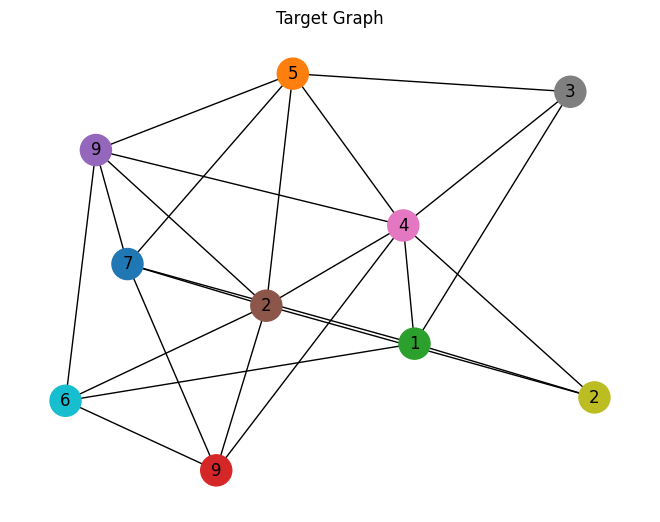

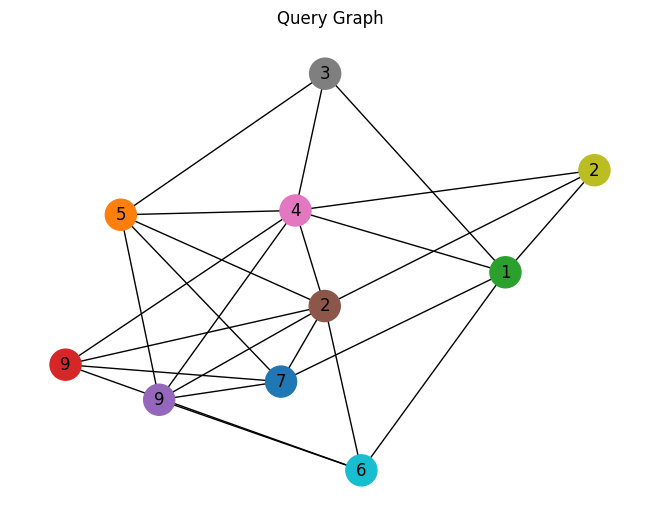

In [9]:
'''
This cell allows to see the target and query graphs. The number represents the node label while the color represents each pair matching
'''

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import csv

target_graph_df = pd.read_csv('data/graph_target_10_10.csv', skiprows=1)
query_graph_df = pd.read_csv('data/graph_query_10_10.csv', skiprows=1)

# Create graphs from the dataframes
target_graph = nx.Graph()
query_graph = nx.Graph()

# Add edges and labels for target graph
for _, row in target_graph_df.iterrows():
    u, v, l1, l2 = row['u'], row['v'], row['l1'], row['l2']
    target_graph.add_edge(u, v)
    target_graph.nodes[u]['label'] = l1
    target_graph.nodes[v]['label'] = l2

# Add edges and labels for query graph
for _, row in query_graph_df.iterrows():
    u, v, l1, l2 = row['u'], row['v'], row['l1'], row['l2']
    query_graph.add_edge(u, v)
    query_graph.nodes[u]['label'] = l1
    query_graph.nodes[v]['label'] = l2

# Define a function to draw the graph with labels
def draw_graph_with_mapping(graph, title, mapping=None):
    pos = nx.spring_layout(graph)
    labels = nx.get_node_attributes(graph, 'label')

    # If mapping is provided, create a color map for corresponding nodes
    if mapping:
        color_map = {}
        colors = list(mcolors.TABLEAU_COLORS.values())  # Use a predefined list of distinct colors
        for i, (node_target, node_query) in enumerate(mapping.items()):
            color_map[node_target] = colors[i % len(colors)]
            color_map[node_query] = colors[i % len(colors)]
        node_colors = [color_map[node] for node in graph.nodes()]
    else:
        node_colors = 'lightblue'

    nx.draw(graph, pos, with_labels=True, labels=labels, node_color=node_colors, node_size=500, font_size=12)
    plt.title(title)
    plt.show()

# Draw both graphs
mapping = {0: 0, 2: 2, 3: 3, 4: 4, 8: 8, 9: 9, 1: 1, 5: 5, 6: 6, 7: 7}
draw_graph_with_mapping(target_graph, "Target Graph", mapping)
draw_graph_with_mapping(query_graph, "Query Graph", mapping)


COMPILE AND RUN TESTS ON BOTH VERSION OF THE PROGRAM

In [26]:
'''
Two test has been performed for each version of the program:
- The ORDERING TEST checks if the result of the first phase of ordering is correct. As a result there are 2 potential orders expected because they are equivalent
- The IsoMapping TEST checks if the final result (the mappings) are correct
'''

print('SEQUENTIAL VERSION TEST')
!./vf2pp_sequential_test1 10 10

print("\n")
print('PARALLEL VERSION TEST')
!./vf2pp_parallel_test1 10 10 256

SEQUENTIAL VERSION TEST

Ordering test
Expected order 1: 1 9 2 8 4 5 3 6 0 7 
Expected order 2: 1 9 2 8 4 6 3 5 0 7 
Result order: 1 9 2 8 4 5 3 6 0 7 
Ordering test passed

IsoMapping test
Expected mapping: 0 1 2 3 4 5 6 7 8 9 
Expected reverse mapping: 0 1 2 3 4 5 6 7 8 9 
Result mapping: 0 1 2 3 4 5 6 7 8 9 
Result reverse mapping: 0 1 2 3 4 5 6 7 8 9 
IsoMapping test passed


PARALLEL VERSION TEST

Ordering test
Expected order 1: 1 9 2 8 4 5 3 6 0 7 
Expected order 2: 1 9 2 8 4 6 3 5 0 7 
Result order: 1 9 2 8 4 6 3 5 0 7 
Ordering test passed

IsoMapping test
Expected mapping: 0 1 2 3 4 5 6 7 8 9 
Expected reverse mapping: 0 1 2 3 4 5 6 7 8 9 
Result mapping: 0 1 2 3 4 5 6 7 8 9 
Result reverse mapping: 0 1 2 3 4 5 6 7 8 9 
IsoMapping test passed


TEST 2

VISUALIZATION OF THE GRAPHS OF SIZE 15

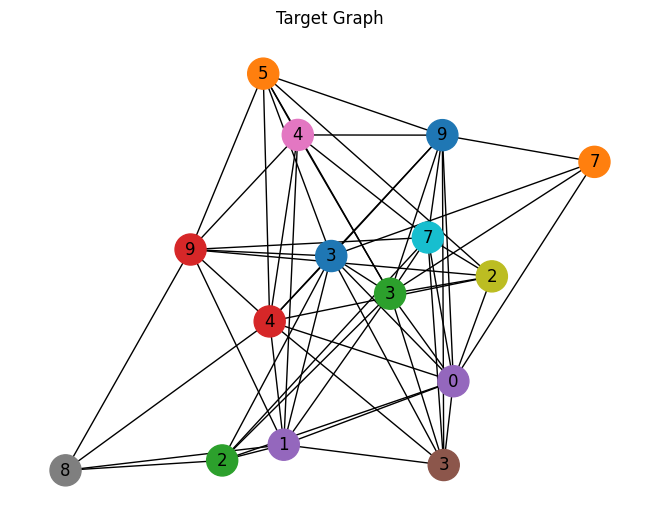

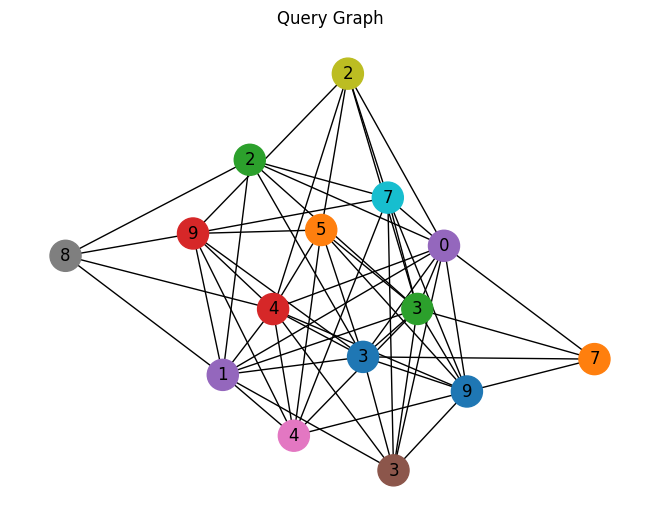

In [29]:
'''
This cell allows to see the target and query graphs. The number represents the node label while the color represents each pair matching
'''

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import csv

target_graph_df = pd.read_csv('data/graph_target_15_15.csv', skiprows=1)
query_graph_df = pd.read_csv('data/graph_query_15_15.csv', skiprows=1)

# Create graphs from the dataframes
target_graph = nx.Graph()
query_graph = nx.Graph()

# Add edges and labels for target graph
for _, row in target_graph_df.iterrows():
    u, v, l1, l2 = row['u'], row['v'], row['l1'], row['l2']
    target_graph.add_edge(u, v)
    target_graph.nodes[u]['label'] = l1
    target_graph.nodes[v]['label'] = l2

# Add edges and labels for query graph
for _, row in query_graph_df.iterrows():
    u, v, l1, l2 = row['u'], row['v'], row['l1'], row['l2']
    query_graph.add_edge(u, v)
    query_graph.nodes[u]['label'] = l1
    query_graph.nodes[v]['label'] = l2

# Define a function to draw the graph with labels
def draw_graph_with_mapping(graph, title, mapping=None):
    pos = nx.spring_layout(graph)
    labels = nx.get_node_attributes(graph, 'label')

    # If mapping is provided, create a color map for corresponding nodes
    if mapping:
        color_map = {}
        colors = list(mcolors.TABLEAU_COLORS.values())  # Use a predefined list of distinct colors
        for i, (node_target, node_query) in enumerate(mapping.items()):
            color_map[node_target] = colors[i % len(colors)]
            color_map[node_query] = colors[i % len(colors)]
        node_colors = [color_map[node] for node in graph.nodes()]
    else:
        node_colors = 'lightblue'

    nx.draw(graph, pos, with_labels=True, labels=labels, node_color=node_colors, node_size=500, font_size=12)
    plt.title(title)
    plt.show()

# Draw both graphs
mapping = {0: 0, 2: 2, 3: 3, 4: 4, 8: 8, 9: 9, 1: 1, 5: 5, 6: 6, 7: 7, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15}
draw_graph_with_mapping(target_graph, "Target Graph", mapping)
draw_graph_with_mapping(query_graph, "Query Graph", mapping)


COMPILE AND RUN TESTS ON BOTH VERSION OF THE PROGRAM

In [27]:
'''
Two test has been performed for each version of the program:
- The ORDERING TEST checks if the result of the first phase of ordering is correct. As a result there are 2 potential orders expected because they are equivalent
- The IsoMapping TEST checks if the final result (the mappings) are correct
'''

print('SEQUENTIAL VERSION TEST')
!./vf2pp_sequential_test2 15 15

print("\n")
print('PARALLEL VERSION TEST')
!./vf2pp_parallel_test2 15 15 256

SEQUENTIAL VERSION TEST

Ordering test
Expected order 1: 8 3 0 14 9 13 10 7 12 6 2 4 1 11 5 
Expected order 2: 8 3 0 14 9 13 10 7 12 6 2 4 11 1 5 
Result order: 8 3 0 14 9 13 10 7 12 6 2 4 1 11 5 
Ordering test passed

IsoMapping test
Expected mapping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
Expected reverse mapping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
Result mapping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
Result reverse mapping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
IsoMapping test passed


PARALLEL VERSION TEST

Ordering test
Expected order 1: 8 3 0 14 9 13 10 7 12 6 2 4 1 11 5 
Expected order 2: 8 3 0 14 9 13 10 7 12 6 2 4 11 1 5 
Result order: 8 3 0 14 9 13 10 7 12 6 2 4 11 1 5 
Ordering test passed

IsoMapping test
Expected mapping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
Expected reverse mapping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
Result mapping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
Result reverse mapping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
IsoMapping test passed


TEST 3

VISUALIZATION OF THE GRAPHS OF SIZE 20

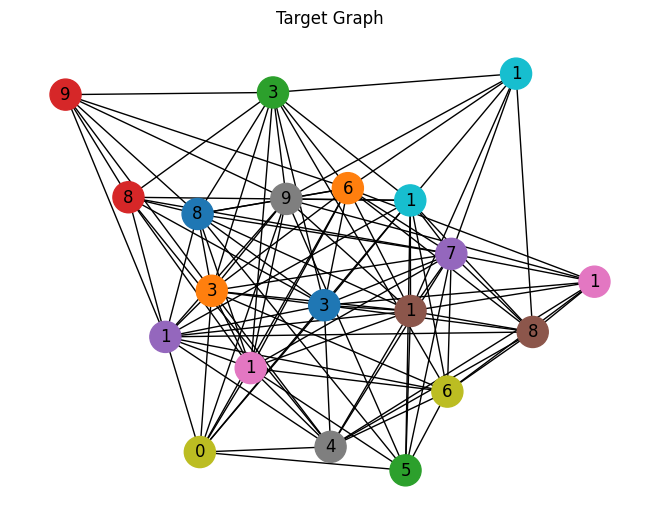

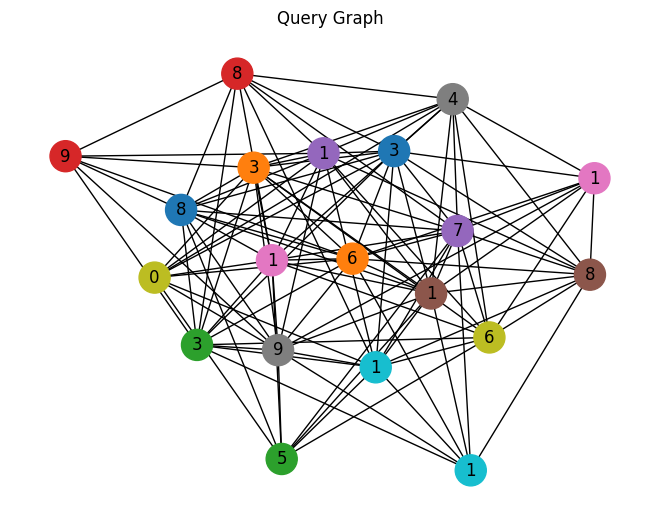

In [32]:
'''
This cell allows to see the target and query graphs. The number represents the node label while the color represents each pair matching
'''

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import csv

target_graph_df = pd.read_csv('data/graph_target_20_20.csv', skiprows=1)
query_graph_df = pd.read_csv('data/graph_query_20_20.csv', skiprows=1)

# Create graphs from the dataframes
target_graph = nx.Graph()
query_graph = nx.Graph()

# Add edges and labels for target graph
for _, row in target_graph_df.iterrows():
    u, v, l1, l2 = row['u'], row['v'], row['l1'], row['l2']
    target_graph.add_edge(u, v)
    target_graph.nodes[u]['label'] = l1
    target_graph.nodes[v]['label'] = l2

# Add edges and labels for query graph
for _, row in query_graph_df.iterrows():
    u, v, l1, l2 = row['u'], row['v'], row['l1'], row['l2']
    query_graph.add_edge(u, v)
    query_graph.nodes[u]['label'] = l1
    query_graph.nodes[v]['label'] = l2

# Define a function to draw the graph with labels
def draw_graph_with_mapping(graph, title, mapping=None):
    pos = nx.spring_layout(graph)
    labels = nx.get_node_attributes(graph, 'label')

    # If mapping is provided, create a color map for corresponding nodes
    if mapping:
        color_map = {}
        colors = list(mcolors.TABLEAU_COLORS.values())  # Use a predefined list of distinct colors
        for i, (node_target, node_query) in enumerate(mapping.items()):
            color_map[node_target] = colors[i % len(colors)]
            color_map[node_query] = colors[i % len(colors)]
        node_colors = [color_map[node] for node in graph.nodes()]
    else:
        node_colors = 'lightblue'

    nx.draw(graph, pos, with_labels=True, labels=labels, node_color=node_colors, node_size=500, font_size=12)
    plt.title(title)
    plt.show()

# Draw both graphs
mapping = {0: 0, 2: 2, 3: 3, 4: 4, 8: 8, 9: 9, 1: 1, 5: 5, 6: 6, 7: 7, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19}
draw_graph_with_mapping(target_graph, "Target Graph", mapping)
draw_graph_with_mapping(query_graph, "Query Graph", mapping)


COMPILE AND RUN TESTS ON BOTH VERSION OF THE PROGRAM

In [28]:
'''
Two test has been performed for each version of the program:
- The ORDERING TEST checks if the result of the first phase of ordering is correct. As a result there are 2 potential orders expected because they are equivalent
- The IsoMapping TEST checks if the final result (the mappings) are correct
'''

print('SEQUENTIAL VERSION TEST')
!./vf2pp_sequential_test3 20 20

print("\n")
print('PARALLEL VERSION TEST')
!./vf2pp_parallel_test3 20 20 256

SEQUENTIAL VERSION TEST

Ordering test
Expected order 1: 8 9 2 10 11 0 16 5 15 1 6 19 4 3 7 14 17 12 18 13 
Expected order 2: 8 9 2 11 10 0 16 5 15 1 6 19 4 3 7 14 17 12 18 13 
Result order: 8 9 2 10 11 0 16 5 15 1 6 19 4 3 7 14 17 12 18 13 
Ordering test passed

IsoMapping test
Expected mapping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
Expected reverse mapping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
Result mapping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
Result reverse mapping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
IsoMapping test passed


PARALLEL VERSION TEST

Ordering test
Expected order 1: 8 9 2 10 11 0 16 5 15 1 6 19 4 3 7 14 17 12 18 13 
Expected order 2: 8 9 2 11 10 0 16 5 15 1 6 19 4 3 7 14 17 12 18 13 
Result order: 8 9 2 11 10 0 16 5 15 1 6 19 4 3 7 14 17 12 18 13 
Ordering test passed

IsoMapping test
Expected mapping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
Expected reverse mapping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14